In [12]:
import Utils as utl
import seaborn as sns
import matplotlib.pyplot as plt

# PTBL-XL

In [2]:
meta = utl.loadPTBXL()

Load Metadata
Convert SCP Codes


In [3]:
meta.head()

,ecg_id,patient_id,age,sex,height,weight,scp_codes,strat_fold,filename_lr,filename_hr,...,CLBBB,LAO/LAE,ISCI,LMI,RVH,RAO/RAE,WPW,ILBBB,SEHYP,PMI
0,1,15709.0,56.0,1,NaN,63.0,"{'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}",3,records100/00000/00001_lr,records500/00000/00001_hr,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,13243.0,19.0,0,NaN,70.0,"{'NORM': 80.0, 'SBRAD': 0.0}",2,records100/00000/00002_lr,records500/00000/00002_hr,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,20372.0,37.0,1,NaN,69.0,"{'NORM': 100.0, 'SR': 0.0}",5,records100/00000/00003_lr,records500/00000/00003_hr,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,17014.0,24.0,0,NaN,82.0,"{'NORM': 100.0, 'SR': 0.0}",3,records100/00000/00004_lr,records500/00000/00004_hr,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,17448.0,19.0,1,NaN,70.0,"{'NORM': 100.0, 'SR': 0.0}",4,records100/00000/00005_lr,records500/00000/00005_hr,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Age

In [4]:
meta['age_group'] = meta.apply(lambda row: utl.convertAgeToAgeBin(row['age']), axis=1)

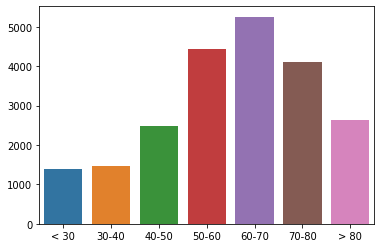

Min Age: 2.0
Max Age: 95.0


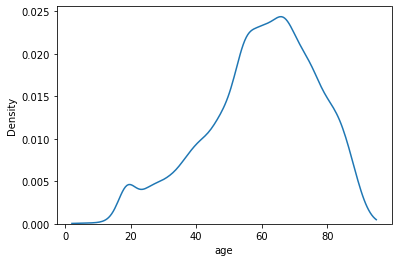

In [23]:
age_groups = meta.groupby('age_group').count().unstack(level=2)
age_groups_counts = age_groups['age']
age_groups_lists = ['< 30', '30-40', '40-50', '50-60', '60-70', '70-80', '> 80']

sns.barplot(x=age_groups_lists, y=age_groups_counts)
plt.show()
print('Min Age:', min(meta.age))
print('Max Age:', max(meta.age))

sns.kdeplot(x=meta.age, cut=0)
plt.show()
#meta.age.plot(kind='kde')

## Gender

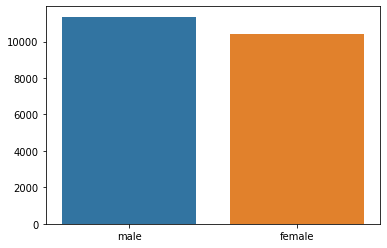

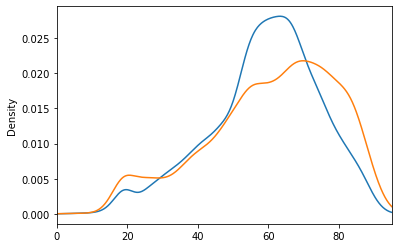

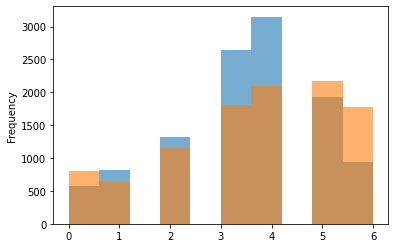

In [60]:
gender_groups = meta.groupby('sex').count().unstack(level=2)
gender_groups_counts = gender_groups['age']
gender_groups_lists = ['male', 'female']

sns.barplot(x=gender_groups_lists, y=gender_groups_counts)
plt.show()

meta.groupby('sex').age.plot(kind='kde', xlim=(0,95), legend=True)
plt.show()

meta.groupby('sex').age_group.plot(kind='hist', alpha=0.6, legend=True)
plt.show()